In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stroke=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke.shape

(5110, 12)

In [6]:
stroke.isnull().sum()/len(stroke)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [7]:
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].mean())

In [8]:
stroke.isnull().sum()/len(stroke)*100

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [9]:
stroke=stroke.drop('id',1)

In [10]:
stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
stroke['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [12]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
stroke1=pd.get_dummies(stroke,columns=['gender','Residence_type','ever_married'],drop_first=True)

In [14]:
tab=stroke1['work_type'].value_counts(normalize=True)
stroke1['work_type']=stroke1['work_type'].map(tab)

In [15]:
tab=stroke1['smoking_status'].value_counts(normalize=True)
stroke1['smoking_status']=stroke1['smoking_status'].map(tab)

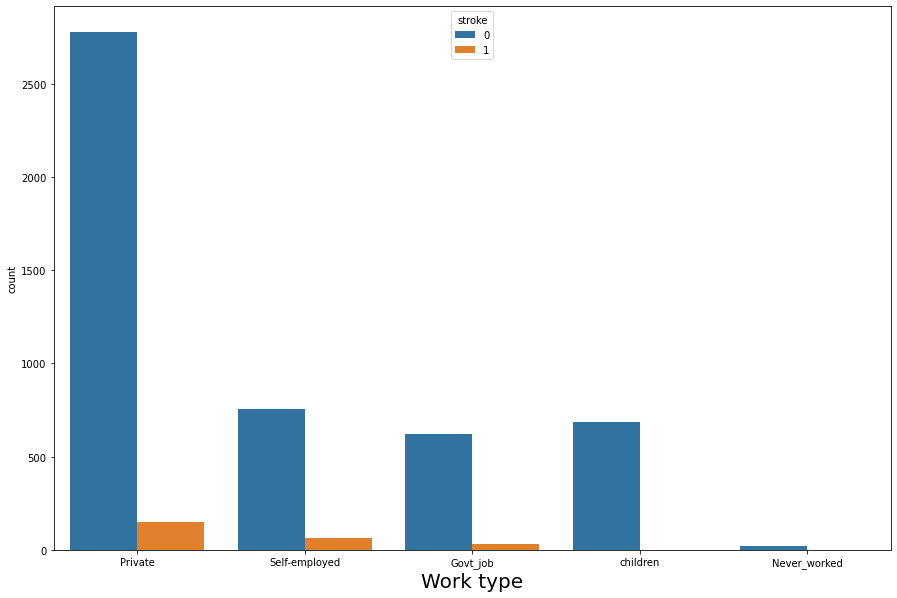

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x="work_type", hue="stroke",data=stroke)
plt.xlabel('Work type',fontsize=20)
plt.show()

#### The  private and self-employed has the similar amount of people having the stroke. However people from the government are more likely to not have a stroke compared with private and self-employed people .The chlidrens are not very likely to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers

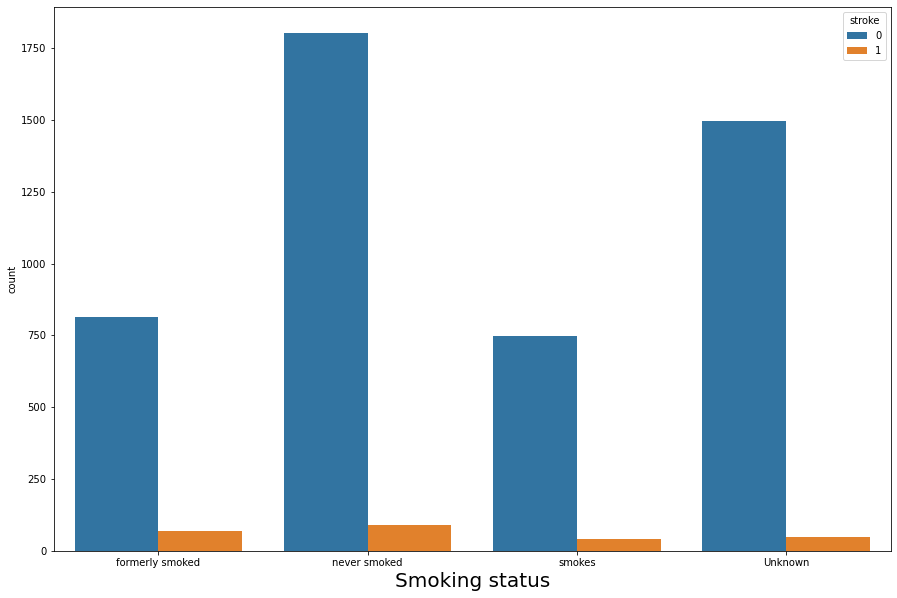

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(x="smoking_status", hue="stroke",data=stroke)
plt.xlabel('Smoking status',fontsize=20)
plt.show()

#### The stroke is not highly correlated to smokers since the proportion of person having a stroke is fairly the same among the different smoking status.

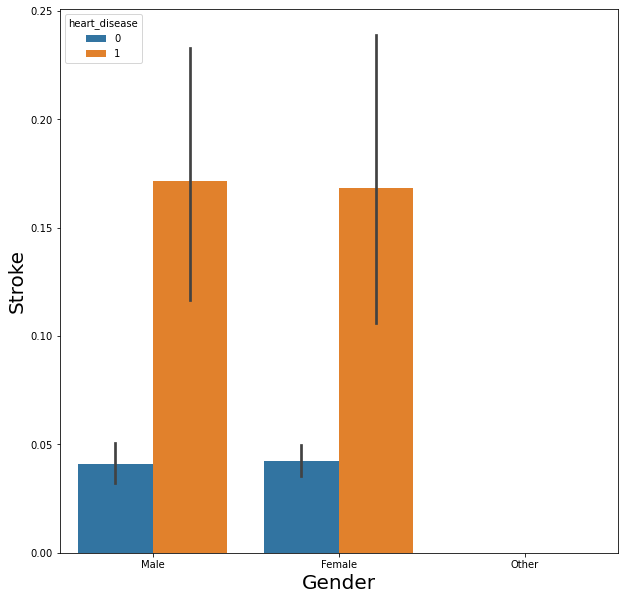

In [18]:
plt.figure(figsize=(10,10))
sns.barplot(x="gender", y="stroke", hue="heart_disease",data=stroke)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Stroke',fontsize=20)
plt.show()

#### From the above plot we can see  that the gender is not a feature to descriminate whether the  person is  having a stroke or not.

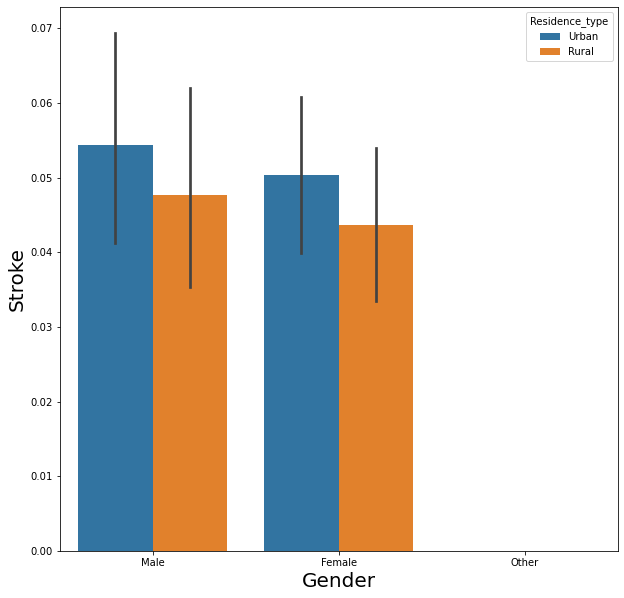

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(x="gender", y="stroke", hue="Residence_type",data=stroke)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Stroke',fontsize=20)
plt.show()

#### From the above plot we can understand that Rural person are less prone to stroke than the  urban people.

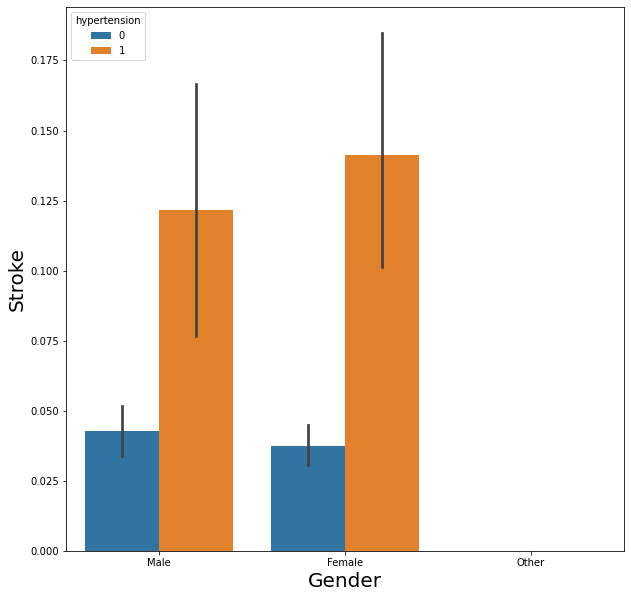

In [20]:
plt.figure(figsize=(10,10))
sns.barplot(x="gender", y="stroke", hue="hypertension",data=stroke)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Stroke',fontsize=20)
plt.show()

#### From the above plot it is understood that hypertension and heart disease features are correlated to stroke.

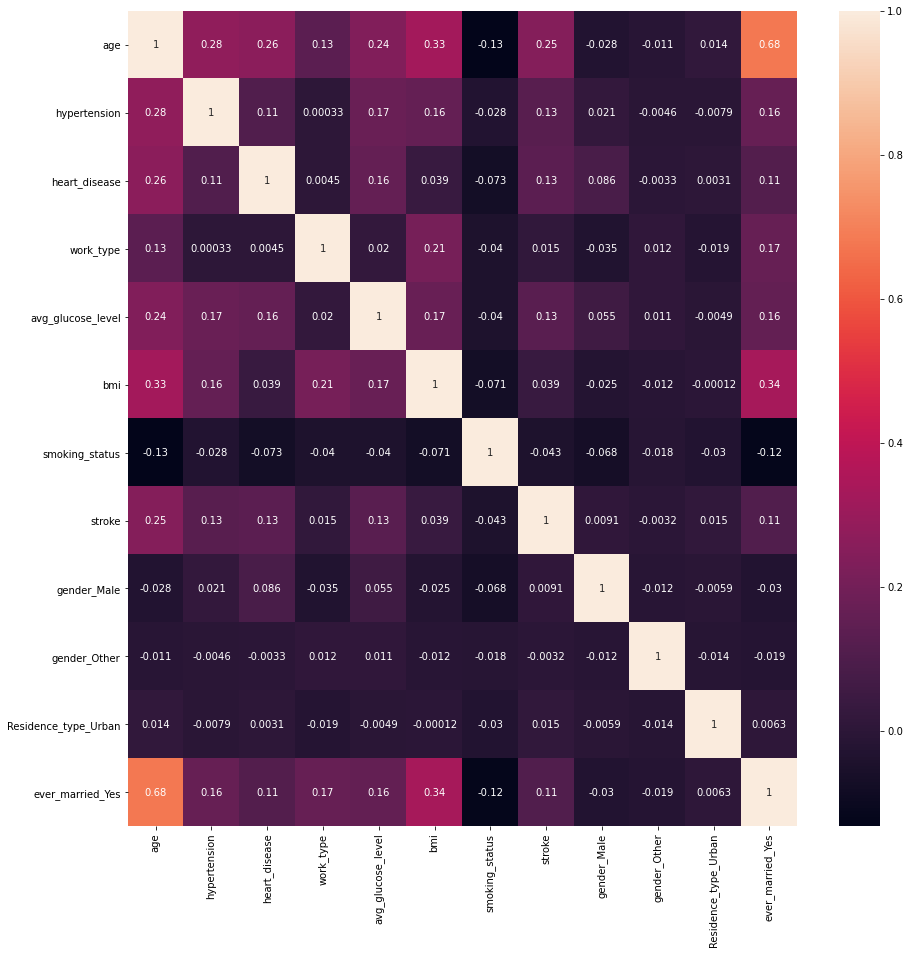

In [21]:
plt.figure(figsize=(15,15))
sns.heatmap(stroke1.corr(),annot=True)
plt.show()

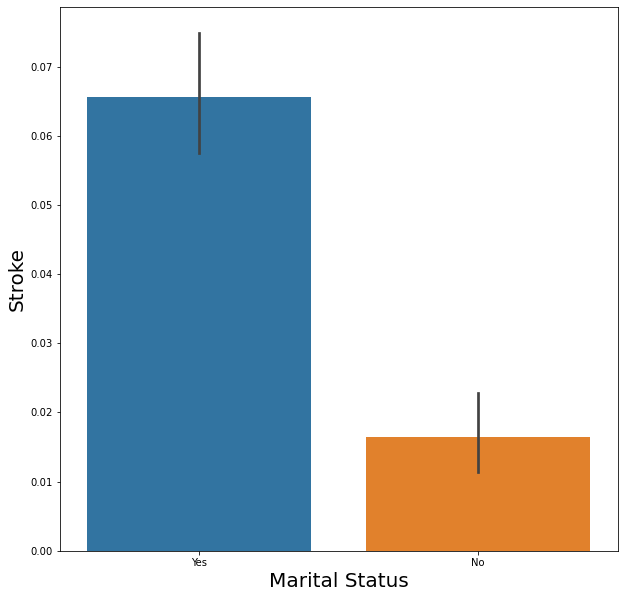

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x="ever_married", y="stroke",data=stroke)
plt.xlabel('Marital Status',fontsize=20)
plt.ylabel('Stroke',fontsize=20)
plt.show()

#### From the above plot it is understood that people who are married are much affected by stroke than the unmarried people.

Text(0.5, 0, 'Stroke')

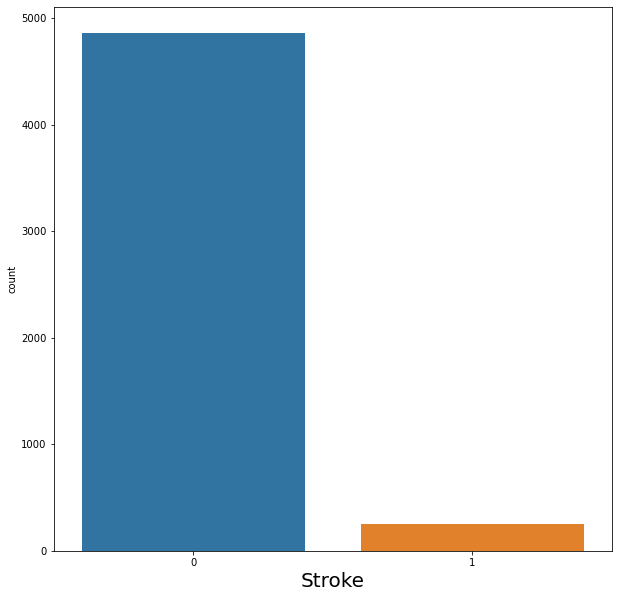

In [23]:
plt.figure(figsize=(10,10))
sns.countplot(stroke['stroke'])
plt.xlabel('Stroke',fontsize=20)

#### Data is imbalanced therefore SMOTE analysis can be performed

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
stroke_sca=ss.fit_transform(stroke1)
stroke_sc = pd.DataFrame(stroke1, columns = stroke1.columns)

In [25]:
stroke_sc.head(3)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,gender_Other,Residence_type_Urban,ever_married_Yes
0,67.0,0,1,0.572407,228.69,36.600000,0.173190,1,1,0,1,1
1,61.0,0,0,0.160274,202.21,28.893237,0.370254,1,0,0,0,1
2,80.0,0,1,0.572407,105.92,32.500000,0.370254,1,1,0,0,1


In [26]:
inp=stroke_sc.drop('stroke',1)

In [27]:
out=stroke1[['stroke']]

In [28]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [29]:
x = sm.add_constant(inp)
xtrain, xtest, ytrain, ytest = train_test_split(x,out, random_state = 48, test_size = 0.3)
print('X_train', xtrain.shape)
print('y_train', ytrain.shape)
print('X_test', xtest.shape)
print('y_test', ytest.shape)

X_train (3577, 12)
y_train (3577, 1)
X_test (1533, 12)
y_test (1533, 1)


In [30]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline

In [31]:
stroke1['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [32]:
count_class_0 = 2000
count_class_1 = 2000
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1})
                    ,NearMiss(sampling_strategy={0: count_class_0}))
inp_bal, out_bal = pipe.fit_resample(x,out)

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(inp_bal,out_bal,test_size=0.3,random_state=48)

In [34]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       603
           1       0.71      0.72      0.71       597

    accuracy                           0.71      1200
   macro avg       0.71      0.71      0.71      1200
weighted avg       0.71      0.71      0.71      1200



In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,KFold
from xgboost import XGBClassifier

In [38]:
clf1 = LogisticRegression(max_iter=3000)
clf2= DecisionTreeClassifier(random_state=0)
clf3=  RandomForestClassifier(random_state=0)
clf4 = KNeighborsClassifier(n_neighbors=5) 
clf5= GaussianNB()
clf6=XGBClassifier(verbosity=0,random_state=0)

In [39]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for i,j in zip([clf1,clf2,clf3,clf4,clf5,clf6],['LR','DT','RF','KNN','GNB','XGB']):
    score = cross_val_score(i, inp_bal,out_bal, cv=kf, scoring='f1')
    print(j,np.mean(score),np.std(score)/np.mean(score))

LR 0.7183588824951792 0.009553812055753846
DT 0.8658702725460404 0.012793080376262981
RF 0.9116782672500909 0.009420800204516777
KNN 0.8088493554664702 0.0044121284783509756
GNB 0.7158351526925979 0.016428979450575757
XGB 0.9113506517594736 0.00858854790962965


In [40]:
from sklearn.ensemble import VotingClassifier

In [41]:
estimator=[('RF',RandomForestClassifier()),('DT',DecisionTreeClassifier()),
          ('XGB',XGBClassifier(verbosity=0))]

In [42]:
vot1=VotingClassifier(estimators=estimator, voting='hard')  
vot2=VotingClassifier(estimators=estimator, voting='soft')

In [43]:
score_vot1 = cross_val_score(vot1, inp_bal,out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot2, inp_bal,out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

vot1 0.9143018626408106 0.012758771315144864
vot2 0.9050525390532862 0.005810794298460336


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
params={'n_estimators':list(range(10,50,5)),
        'max_features':['auto','sqrt','log2'],
        'criterion':['gini','entropy'],
        'max_depth':[5,10,15,20,25]}

In [46]:
rf_mod1=RandomForestClassifier()
hyp_mod=GridSearchCV(rf_mod1,param_grid=params,scoring='f1')

In [47]:
tun_mod=hyp_mod.fit(xtrain,ytrain)

In [48]:
tun_mod.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 45}

In [49]:
params={'n_estimators':list(range(10,50,5)),
        'max_features':['auto','sqrt','log2'],
        'criterion':['gini','entropy'],
        'max_depth':[5,10,15,20,25]}

In [55]:
tuning_parameters = {'n_estimators':list(range(10,50,5)),
                   'colsample_bytree':[0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
xgb_model = XGBClassifier()

xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'f1')


In [56]:
tun_mod=xgb_grid.fit(xtrain,ytrain)

In [57]:
tun_mod.best_params_

{'colsample_bytree': 0.5, 'n_estimators': 40}

In [58]:
from sklearn.ensemble import VotingClassifier
estimator=[('RF',RandomForestClassifier(criterion= 'entropy',max_depth= 15,max_features= 'auto',n_estimators= 35)),
           ('DT',DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, max_features= 'sqrt', 
                                        max_leaf_nodes= 9, min_samples_leaf= 5, min_samples_split= 3)),
          ('XGB',XGBClassifier(colsample_bytree= 0.5, n_estimators= 40,verbosity=0))]

In [59]:
vot_1=VotingClassifier(estimators=estimator, voting='hard')  
vot_2=VotingClassifier(estimators=estimator, voting='soft')

In [60]:
kf=KFold(n_splits=5,shuffle=True,random_state=0)

In [61]:
score_vot1 = cross_val_score(vot_1, inp_bal,out_bal, cv=kf, scoring='f1')
score_vot2 = cross_val_score(vot_2, inp_bal,out_bal, cv=kf, scoring='f1')
print('vot1',np.mean(score_vot1),np.std(score_vot1)/np.mean(score_vot1))
print('vot2',np.mean(score_vot2),np.std(score_vot2)/np.mean(score_vot2))

vot1 0.9051962903771822 0.004594705291092111
vot2 0.9037566617925432 0.009248545006649235


In [63]:
vot_1.fit(xtrain.drop('const',1),ytrain)
ypred=vot_1.predict(xtest.drop('const',1))

In [65]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       603
           1       0.92      0.88      0.90       597

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200

